In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Conv2D , MaxPooling2D ,Dropout , Flatten , Dense ,BatchNormalization ,Concatenate ,Input 
from keras.models import Sequential ,Model
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
import warnings
warnings.filterwarnings('ignore')

In [2]:
metadata = pd.read_csv(r'C:\Users\rflip\CNN Approach to Skin Cancer Detection\metadata\HAM10000_metadata.csv')
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
metadata.count()

lesion_id       10015
image_id        10015
dx              10015
dx_type         10015
age              9958
sex             10015
localization    10015
dtype: int64

In [4]:
metadata.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [5]:
metadata['age'] = metadata['age'].fillna(metadata['age'].mean()) 
metadata.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

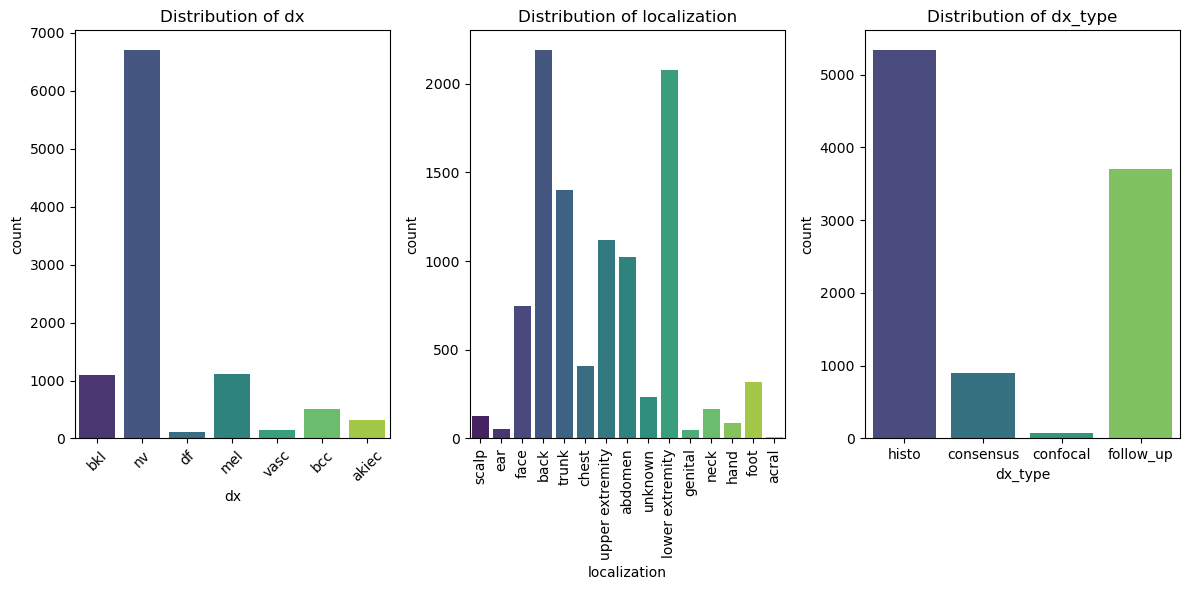

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.countplot(data=metadata , x='dx', palette='viridis')
plt.title('Distribution of dx')
plt.xticks(rotation=45)


plt.subplot(1,3,2)
sns.countplot(data=metadata,x='localization', palette='viridis')
plt.title('Distribution of localization')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.countplot(data=metadata , x = 'dx_type', palette='viridis')
plt.title('Distribution of dx_type')

plt.tight_layout()
plt.show()

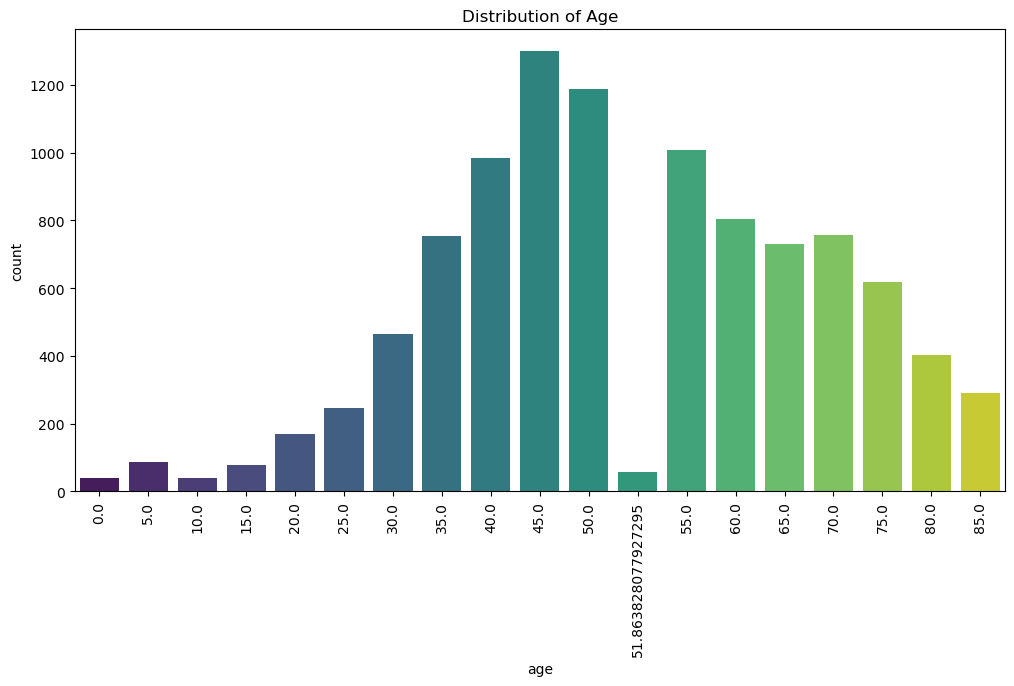

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=metadata ,x='age',palette='viridis')
plt.title('Distribution of Age')
plt.xticks(rotation=90)

plt.show()

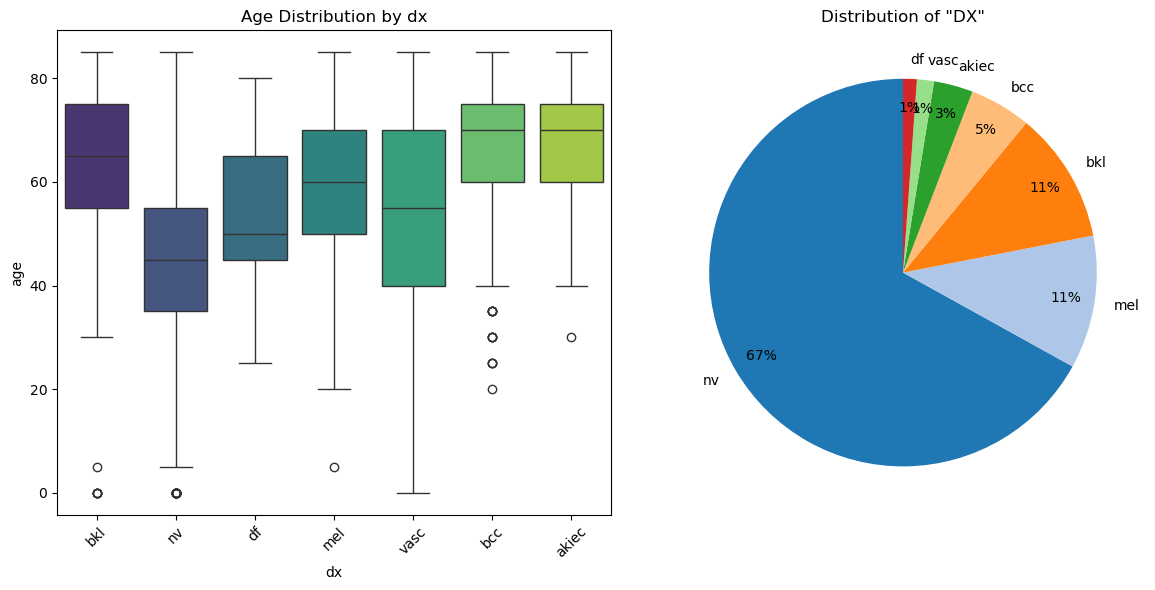

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=metadata, x='dx', y='age', palette='viridis')
plt.title('Age Distribution by dx')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
metadata['dx'].value_counts().plot.pie(
    autopct='%1.f%%', 
    startangle=90,      
    colors=sns.color_palette('tab20', len(metadata['dx'].unique())),
    pctdistance=0.85    
)
plt.title('Distribution of "DX"')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [9]:
metadata['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

In [10]:
def col_values_unique (df):
    for col in df :
        if df[col].dtypes=='object':
            print(col ,f':' ,df[col].unique())
col_values_unique(metadata)

lesion_id : ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
image_id : ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
dx : ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
dx_type : ['histo' 'consensus' 'confocal' 'follow_up']
sex : ['male' 'female' 'unknown']
localization : ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [11]:
metadata_features = metadata[['age','dx_type' ,'sex','localization']].copy()
# feature encoding
metadata_features = pd.get_dummies(metadata_features , columns=['dx_type' ,'sex','localization'],drop_first=True,dtype=int)
# age normalization
metadata_features['age'] = metadata_features['age']/metadata_features['age'].max()

x_metadata = np.array(metadata_features)
# x_metadata
# metadata_features

In [12]:
label_mapping = {
    "bkl": 0,
    "nv": 1,
    "df": 2,
    "mel": 3,
    "vasc": 4,
    "bcc": 5,
    "akiec": 6
}

In [13]:
def load_image(image_id  , image_folder):
    image_path = os.path.join(image_folder , f'{image_id}.jpg')
    return Image.open(image_path)

image_folder1 = r'C:\Users\rflip\CNN Approach to Skin Cancer Detection\metadata\HAM10000_images_part_1'
image_folder2 = r'C:\Users\rflip\CNN Approach to Skin Cancer Detection\metadata\HAM10000_images_part_2'

image_data = []
labels = []
for idx,row in metadata.iterrows():
    i_id = row['image_id']
    dx   = row['dx']
    
    try:
        image = load_image(i_id , image_folder1)
        
    except FileNotFoundError:
        image = load_image(i_id , image_folder2)
    image = image.resize((128,128))
    image = img_to_array(image) /255.0
    
    image_data.append(image)
    labels.append(label_mapping[dx])
  
    
classes = ["Benign keratosis-like lesions 'bkl'" , "Melanocytic nevi 'nv'" ,"Dermatofibroma 'df'",
           "Melanoma 'mel'","Vascular lesions 'vasc'","Basal cell carcinoma 'bcc'" ,
           'Actinic keratoses and intraepithelial carcinoma "akiec"']

In [14]:
classes[labels[1889]]

"Melanoma 'mel'"

In [15]:
def show_samples(i_dex):
    plt.imshow(image_data[i_dex])
    plt.xlabel(classes[labels[i_dex]])
    plt.show()

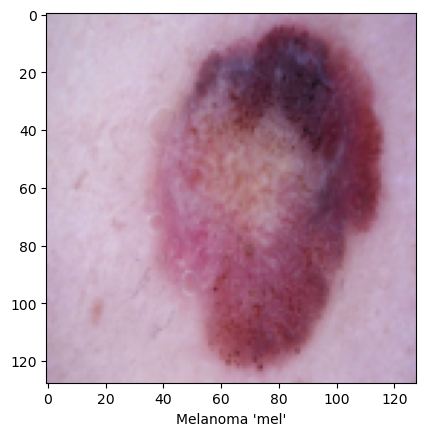

In [16]:
show_samples(1899)

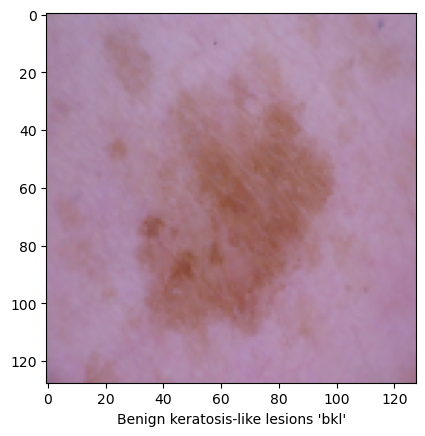

In [17]:
show_samples(802)

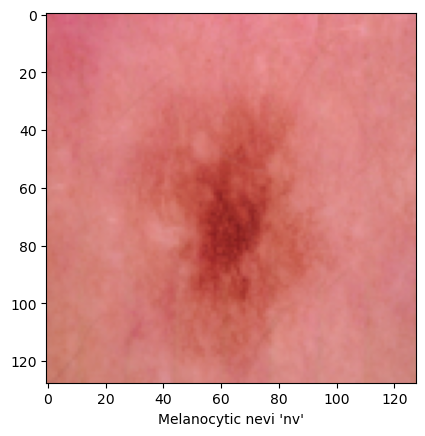

In [18]:
show_samples(6453)

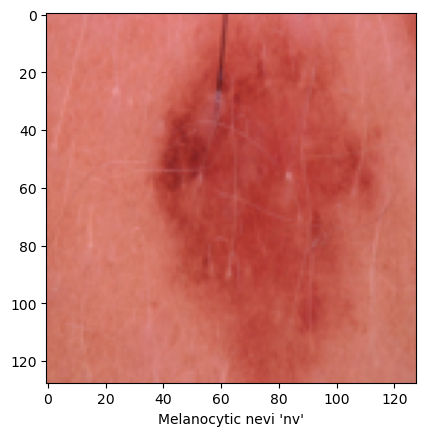

In [19]:
show_samples(4900)

In [20]:
x_image = np.array(image_data)
y = np.array(labels)
y_encoded = pd.get_dummies(y , dtype=int).values
len(y_encoded[1899])

7

In [22]:
classes[np.argmax(y_encoded[1899])]

"Melanoma 'mel'"

In [23]:
x_metadata[22].shape

(20,)

In [24]:
# Image Model (CNN)
image_input = Input(shape=(128,128,3) , name='image_input')
x = Conv2D(32,(3,3) , activation='relu')(image_input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(64,(3,3) , activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(128,(3,3), activation='relu')(x) 
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(.5)(x)
x = Flatten()(x)

# Metadata Model (ANN)
metadata_input = Input(shape=(x_metadata.shape[1],) , name='metadata_input')
y = Dense(64 ,activation='relu')(metadata_input)
y = Dropout(.2)(y)
y = Dense(32 , activation='relu')(y)

#Models Combination
combined = Concatenate()([x,y])

z = Dense(128 ,activation='relu')(combined)
z = Dropout(.5)(z)
z = Dense(64 , activation='relu')(z)

output = Dense(len(y_encoded[0]) , activation='softmax')(z)
model = Model(inputs=[image_input ,metadata_input] , outputs = output)

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=(['accuracy']))

In [25]:
x_train_image , x_test_image , x_train_metadata ,x_test_metadata,y_train ,y_test = train_test_split(x_image,x_metadata , y_encoded ,test_size=.2 ,random_state=42)

history = model.fit([x_train_image ,x_train_metadata] , y_train ,
          validation_data=([x_test_image,x_test_metadata],y_test),batch_size=32 ,validation_split=.2,epochs=50)

Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 124s 477ms/step - accuracy: 0.6188 - loss: 1.4904 - val_accuracy: 0.6680 - val_loss: 1.3284
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 107s 427ms/step - accuracy: 0.6646 - loss: 0.9599 - val_accuracy: 0.6675 - val_loss: 0.8551
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 98s 391ms/step - accuracy: 0.6867 - loss: 0.8514 - val_accuracy: 0.6755 - val_loss: 0.8029
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 98s 391ms/step - accuracy: 0.6957 - loss: 0.7874 - val_accuracy: 0.6900 - val_loss: 0.8008
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 96s 384ms/step - accuracy: 0.6884 - loss: 0.8139 - val_accuracy: 0.6715 - val_loss: 0.8590
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 98s 391ms/step - accuracy: 0.6882 - loss: 0.7924 - val_accuracy: 0.7359 - val_loss: 0.7536
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 99s 394ms/step - accuracy: 0.7092 - loss: 0.7630 - val_accuracy: 0.7129 - val_loss: 0.7634
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 96s 384ms/step - accuracy: 0.7091 - loss:

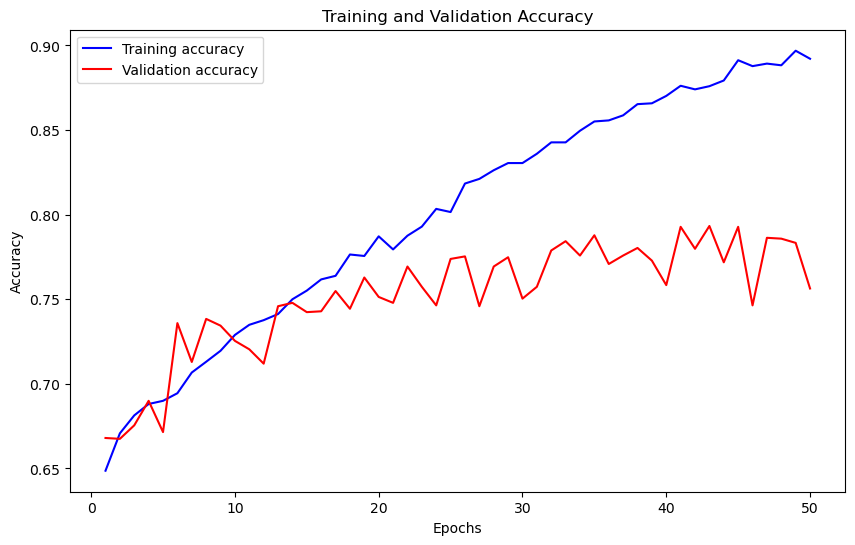

range(1, 51)


In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training & validation accuracy values
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(epochs)

In [27]:
model.evaluate([x_test_image,x_test_metadata] ,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.7527 - loss: 0.8571


[0.8636316657066345, 0.7563654780387878]